# Proyek Analisis Data: Air Quality Daaset
- **Nama:** Vildha Maya Sabila
- **Email:** mayasabila194@gmail.com
- **ID Dicoding: vildhamaya** 

## Menentukan Pertanyaan Bisnis


- Bagaimana kondisi harian udara di Wanliu dan Wanshouxigong,pada jam berapa kadar polutan cenderung tinggi?
- Bagaimana Ringkasan kadar polutan Bulanan di Wanliu dan Wanshouxigong pada Mei 2015?

## Import Semua Packages/Library yang Digunakan

In [5]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

Dataset Kota Wanliu

In [7]:
wanliu_df= pd.read_csv("./data/PRSA_Data_Wanliu_20130301-20170228.csv")
wanliu_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,27.0,4.0,20.0,300.0,81.0,12.6,1011.9,-14.3,0.0,N,2.0,Wanliu
35060,35061,2017,2,28,20,15.0,43.0,6.0,55.0,500.0,45.0,9.4,1012.3,-11.9,0.0,WSW,1.0,Wanliu
35061,35062,2017,2,28,21,13.0,35.0,7.0,48.0,500.0,48.0,8.7,1012.8,-13.7,0.0,N,1.1,Wanliu
35062,35063,2017,2,28,22,12.0,31.0,5.0,47.0,500.0,50.0,7.8,1012.9,-12.6,0.0,NNE,1.0,Wanliu


Dataset Kota Wanshouxigong

In [8]:
Wanshouxigong_df= pd.read_csv("./data/PRSA_Data_Wanshouxigong_20130301-20170228.csv")
Wanshouxigong_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


### Assessing Data

Menggabungkan kedua dataset menjadi satu

In [9]:
main_df = pd.concat([wanliu_df,Wanshouxigong_df],ignore_index=True)
main_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70123,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
70124,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
70125,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
70126,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


**Dataset AQ kota Wanliu , Wanshouxigong**





In [10]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       70128 non-null  int64  
 1   year     70128 non-null  int64  
 2   month    70128 non-null  int64  
 3   day      70128 non-null  int64  
 4   hour     70128 non-null  int64  
 5   PM2.5    69050 non-null  float64
 6   PM10     69360 non-null  float64
 7   SO2      68884 non-null  float64
 8   NO2      68304 non-null  float64
 9   CO       67019 non-null  float64
 10  O3       66943 non-null  float64
 11  TEMP     70089 non-null  float64
 12  PRES     70089 non-null  float64
 13  DEWP     70089 non-null  float64
 14  RAIN     70089 non-null  float64
 15  wd       69926 non-null  object 
 16  WSPM     70101 non-null  float64
 17  station  70128 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 9.6+ MB


cek apakah ada null value pada dataset

In [11]:
main_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5      1078
PM10        768
SO2        1244
NO2        1824
CO         3109
O3         3185
TEMP         39
PRES         39
DEWP         39
RAIN         39
wd          202
WSPM         27
station       0
dtype: int64

memberikan ringkasan statistik dari data dalam DataFrame, seperti rata-rata, standar deviasi, nilai minimum, kuartil, dan nilai maksimum untuk setiap kolom numerik dalam DataFrame.

In [12]:
main_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,70128.000000,70128.000000,70128.000000,70128.000000,70128.000000,69050.000000,69360.000000,68884.000000,68304.000000,67019.000000,66943.000000,70089.000000,70089.000000,70089.000000,70089.000000,69926,70101.000000,70128
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Wanliu
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10271,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.195676,111.341502,17.763380,60.371669,1345.070383,52.608297,13.606673,1011.304673,2.987011,0.066291,NaN,1.623266,NaN
std,10122.177085,1.177205,3.448728,8.800155,6.922236,83.959633,95.220822,23.291772,37.232115,1245.909002,56.240983,11.367370,10.465620,13.693862,0.848316,NaN,1.162951,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.642400,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,600.000000,6.000000,3.300000,1002.700000,-8.300000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,90.000000,9.000000,54.000000,1000.000000,37.000000,14.500000,1010.900000,3.600000,0.000000,NaN,1.300000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,154.000000,22.000000,83.000000,1600.000000,78.000000,23.200000,1019.750000,15.500000,0.000000,NaN,2.100000,NaN


### Cleaning Data

menambah 1 field untuk menggabungkan field year,month,dan day menjadi date

In [13]:
main_df['date'] = pd.to_datetime(main_df[['year', 'month', 'day']])
main_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu,2013-03-01
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu,2013-03-01
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu,2013-03-01
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu,2013-03-01
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu,2013-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70123,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong,2017-02-28
70124,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong,2017-02-28
70125,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong,2017-02-28
70126,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong,2017-02-28


menghilangkan missing value menggunakan teknik interpolation dan drop


In [14]:
col = ["PM2.5","PM10","SO2","NO2","CO","O3","TEMP","PRES","DEWP","RAIN","WSPM"]

# col = [PM25,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM]
for x in col:
  main_df[x].interpolate(method="linear",limit_direction='both', inplace=True)

main_df.dropna(axis=0,inplace=True)


In [15]:
main_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
date       0
dtype: int64

In [16]:
main_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu,2013-03-01
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu,2013-03-01
2,3,2013,3,1,2,3.0,6.0,7.0,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu,2013-03-01
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,350.0,54.5,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu,2013-03-01
4,5,2013,3,1,4,3.0,13.0,9.0,15.5,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu,2013-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70123,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong,2017-02-28
70124,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong,2017-02-28
70125,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong,2017-02-28
70126,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong,2017-02-28


## Exploratory Data Analysis (EDA)

### Explore ...

memberikan ringkasan statistik dari data dalam DataFrame, seperti rata-rata, standar deviasi, nilai minimum, kuartil, dan nilai maksimum untuk setiap kolom numerik dalam DataFrame.

In [17]:
main_df.describe(include="all")

C:\Users\sapyy\AppData\Local\Temp\ipykernel_8292\784603574.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  main_df.describe(include="all")


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
count,69926.000000,69926.000000,69926.000000,69926.000000,69926.000000,69926.000000,69926.000000,69926.000000,69926.000000,69926.000000,69926.000000,69926.000000,69926.000000,69926.000000,69926.000000,69926,69926.000000,69926,69926
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,2,1461
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Wanshouxigong,2013-03-01 00:00:00
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10271,NaN,34985,48
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-03-01 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-28 00:00:00
mean,17494.316878,2014.658282,6.522181,15.725939,11.503876,84.247359,111.605891,17.905069,60.548336,1349.858329,51.507543,13.625685,1011.292301,2.990939,0.066402,NaN,1.626575,NaN,NaN
std,10108.169369,1.175556,3.446306,8.800673,6.917418,84.110597,95.922363,23.463917,37.275167,1245.482425,56.035102,11.364717,10.465076,13.698665,0.849226,NaN,1.161712,NaN,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.642400,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,NaN,0.000000,NaN,NaN
25%,8742.250000,2014.000000,4.000000,8.000000,6.000000,23.000000,40.000000,3.000000,32.000000,600.000000,5.000000,3.300000,1002.700000,-8.300000,0.000000,NaN,0.900000,NaN,NaN


menampilkan tabel korelasi antar kolom numerik di dataset

In [18]:
numeric_df = main_df.select_dtypes(include=[np.number])
numeric_df.corr()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
No,1.000000,0.969486,0.043472,0.017173,0.001374,-0.037746,-0.077165,-0.251166,-0.092262,0.000678,0.007568,-0.120772,0.222582,-0.116608,0.005318,0.025724
year,0.969486,1.000000,-0.201909,-0.006333,0.000623,-0.041379,-0.071573,-0.190648,-0.089201,-0.009717,0.029830,-0.149543,0.216863,-0.179266,0.001502,0.062800
month,0.043472,-0.201909,1.000000,0.011152,0.000248,0.016878,-0.019688,-0.229154,-0.007294,0.042551,-0.090968,0.128679,0.001230,0.266003,0.015838,-0.153002
day,0.017173,-0.006333,0.011152,1.000000,-0.000406,0.004458,0.031645,0.000185,0.015284,-0.014859,0.004766,0.014125,0.020859,0.023728,-0.005826,-0.010938
hour,0.001374,0.000623,0.000248,-0.000406,1.000000,0.002473,0.039809,0.020673,-0.020976,-0.053682,0.282512,0.140078,-0.037362,-0.012213,0.010874,0.149905
PM2.5,-0.037746,-0.041379,0.016878,0.004458,0.002473,1.000000,0.883233,0.500829,0.674369,0.777483,-0.179095,-0.160701,0.020838,0.087538,-0.016495,-0.271146
PM10,-0.077165,-0.071573,-0.019688,0.031645,0.039809,0.883233,1.000000,0.489782,0.666589,0.698329,-0.149382,-0.133690,-0.010835,0.047313,-0.031427,-0.198706
SO2,-0.251166,-0.190648,-0.229154,0.000185,0.020673,0.500829,0.489782,1.000000,0.506881,0.553110,-0.189002,-0.343799,0.217259,-0.284769,-0.040350,-0.095020
NO2,-0.092262,-0.089201,-0.007294,0.015284,-0.020976,0.674369,0.666589,0.506881,1.000000,0.681686,-0.502150,-0.302589,0.131618,-0.041509,-0.051920,-0.426159
CO,0.000678,-0.009717,0.042551,-0.014859,-0.053682,0.777483,0.698329,0.553110,0.681686,1.000000,-0.321523,-0.368697,0.197950,-0.101628,-0.018403,-0.293027


RFM Analysis menampilkan recency frequency dan Monetary

In [19]:
recency = main_df.groupby('station')['date'].max()
recency

station
Wanliu          2017-02-28
Wanshouxigong   2017-02-28
Name: date, dtype: datetime64[ns]

In [20]:
frequency = main_df.groupby('station').size()
frequency

station
Wanliu           34941
Wanshouxigong    34985
dtype: int64

In [21]:
numeric_cols = main_df.select_dtypes(include=[np.number]).columns
monetary = main_df.groupby('station')[numeric_cols].mean()
monetary

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
station,,,,,,,,,,,,,,,,
Wanliu,17487.013394,2014.657623,6.520048,15.727398,11.505624,83.459413,110.711924,18.437457,65.642774,1326.927735,47.014265,13.451493,1011.082719,3.269659,0.068461,1.505120
Wanshouxigong,17501.611176,2014.658940,6.524310,15.724482,11.502129,85.034315,112.498734,17.373349,55.460305,1372.760083,55.995169,13.799657,1011.501620,2.712570,0.064345,1.747878


Menampilkan jumlah data tiap tahunnya

In [22]:
main_df.groupby(by='year').No.count()

year
2013    14686
2014    17517
2015    17500
2016    17452
2017     2771
Name: No, dtype: int64

## Visualization & Explanatory Analysis

**Visualisasi korelasi antar field**

Merah melambagkan korelasi positif antar field contoh PM2.5 memiliki tingkat korelasi 0.88 dengan PM10 artinya nilai antara PM2.5 linear dengan PM10 jika PM2.5 memiliki nilai yang tinggi maka otomatis pm 10 juga akan meiliki nilai yang tinggi dan sebaliknya jika memiliki korelasi negatif suatu nilai akan berkebalikan dengan nilai lainnya conohnya antara PRES dan TEMP , PRES merupakan tekanan udara sedangkan TEMP adalah temperatur, jika TEMP tinggi maka PRES akan rendah nilainya dan sebaliknya.

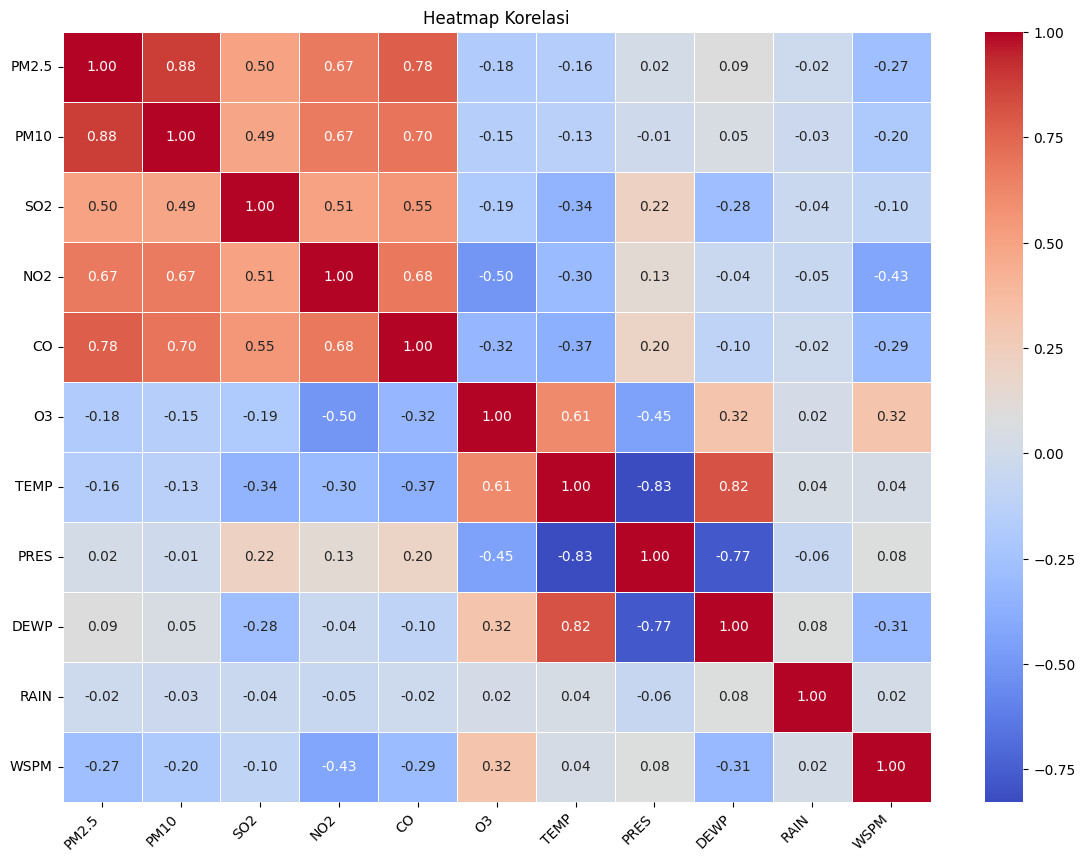

In [23]:

kolom_korelasi = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']


korelasi = main_df[kolom_korelasi].corr()

plt.figure(figsize=(14, 10))
heatmap = sns.heatmap(korelasi, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.title('Heatmap Korelasi')
plt.show()

rata rata kadar polutan tiap tahun

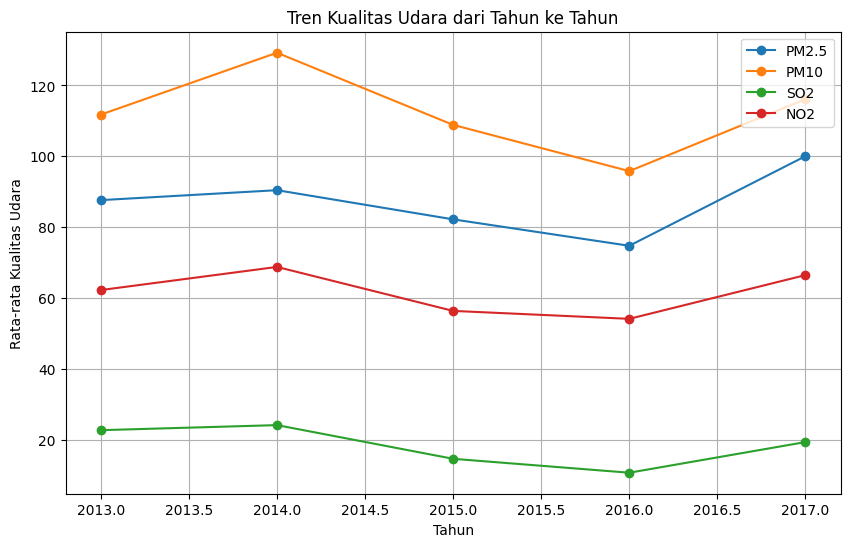

In [24]:
main_df['year'] = main_df['date'].dt.year

# Agregasi data berdasarkan tahun
annual_mean = main_df.groupby('year')[numeric_cols].mean()

# Visualisasi tren kualitas udara dari tahun ke tahun
plt.figure(figsize=(10, 6))
plt.plot(annual_mean.index, annual_mean['PM2.5'], marker='o', label='PM2.5')
plt.plot(annual_mean.index, annual_mean['PM10'], marker='o', label='PM10')
plt.plot(annual_mean.index, annual_mean['SO2'], marker='o', label='SO2')
plt.plot(annual_mean.index, annual_mean['NO2'], marker='o', label='NO2')
# plt.plot(annual_mean.index, annual_mean['CO'], marker='o', label='CO')
plt.title('Tren Kualitas Udara dari Tahun ke Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Kualitas Udara')
plt.legend()
plt.grid(True)
plt.show()

Ringkasan analisis tahunan di Wanliu dan Wanshouxigong,kadar polutan yang ditampilkan yaitu PM2.5, PM10, SO2, NO2 , dan CO untuk CO saya pisahkan sendiri karena nilainya yang terlalu besar dibanding field yang lain bertujuan agar dapat terlihat jelas untuk visualisasi datanya

In [25]:
main_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu,2013-03-01
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu,2013-03-01
2,3,2013,3,1,2,3.0,6.0,7.0,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu,2013-03-01
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,350.0,54.5,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu,2013-03-01
4,5,2013,3,1,4,3.0,13.0,9.0,15.5,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu,2013-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70123,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong,2017-02-28
70124,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong,2017-02-28
70125,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong,2017-02-28
70126,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong,2017-02-28


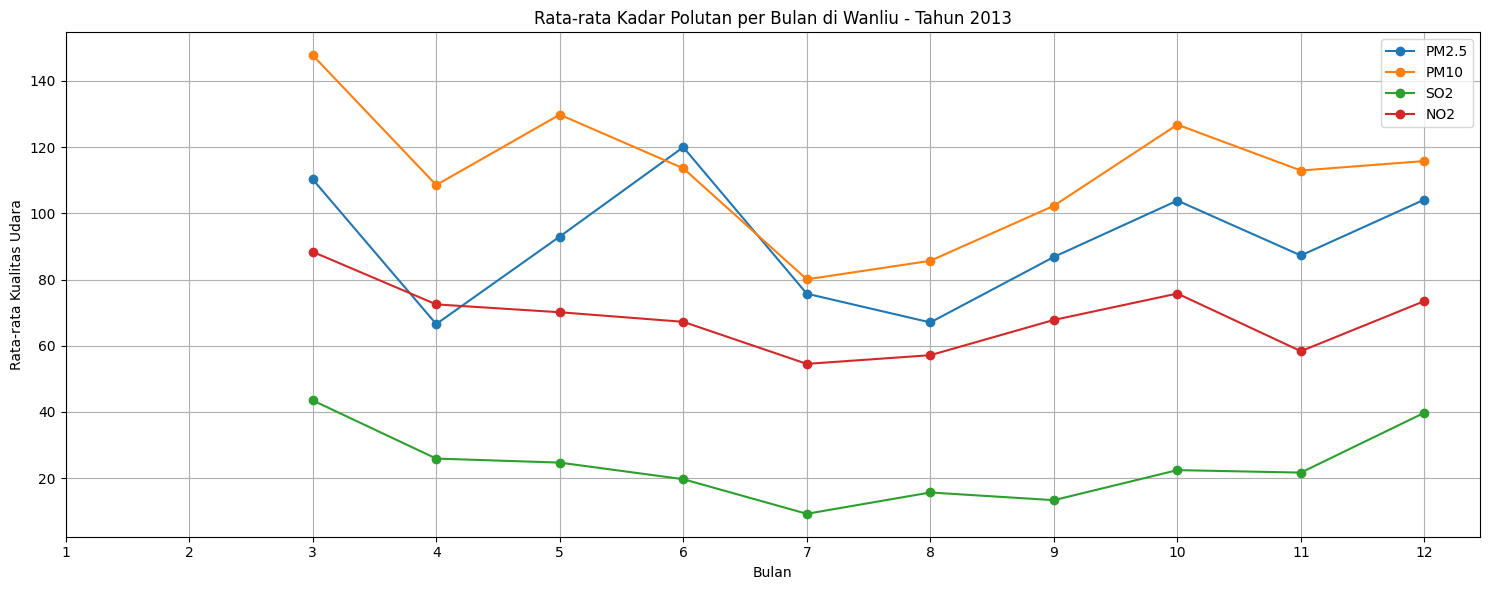

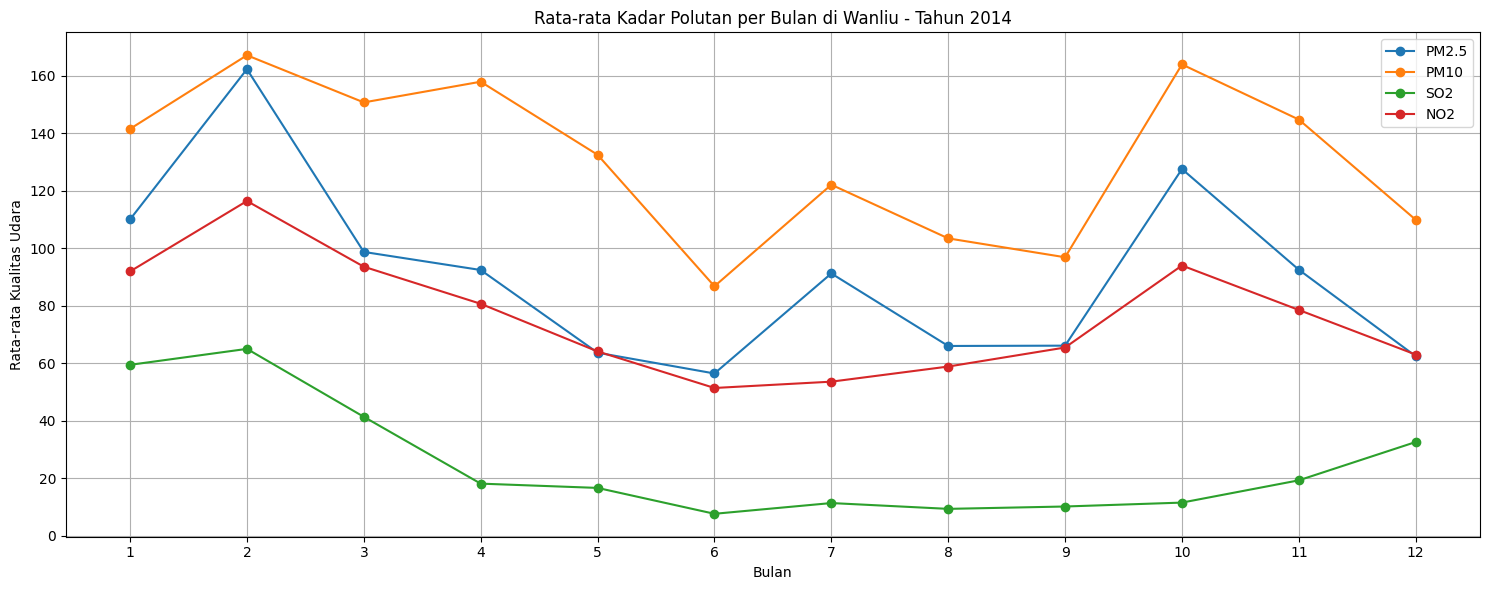

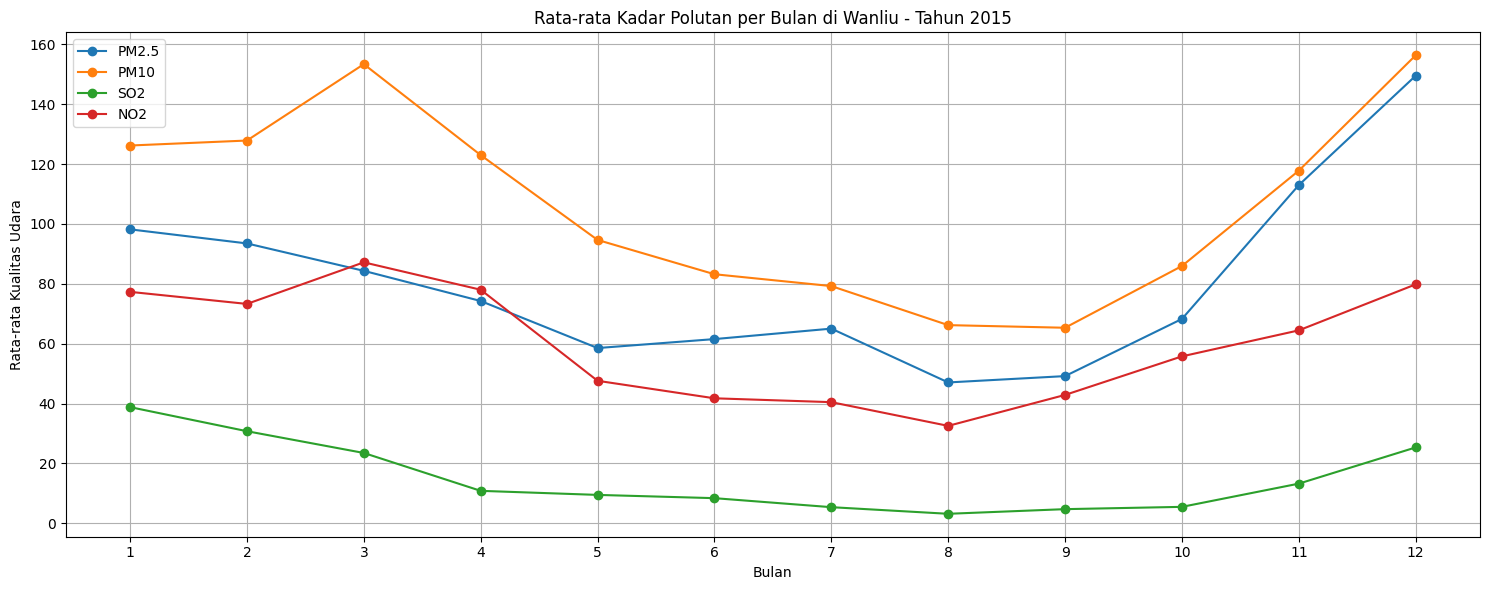

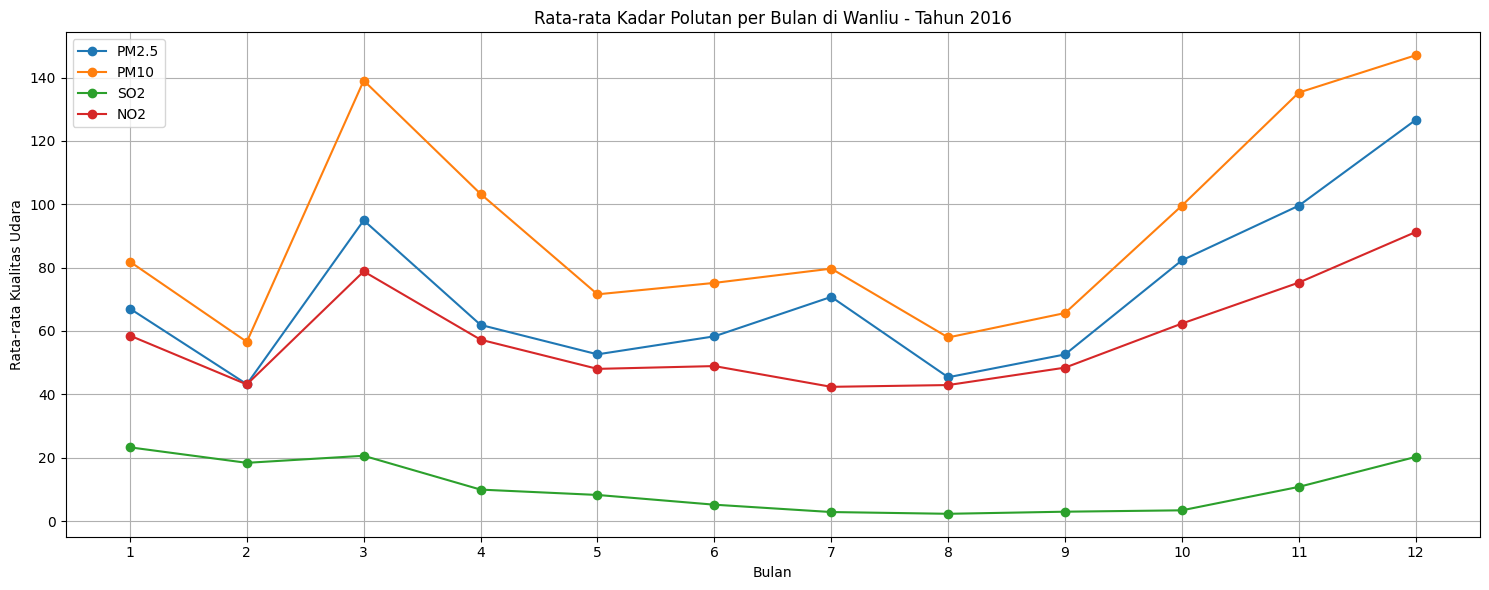

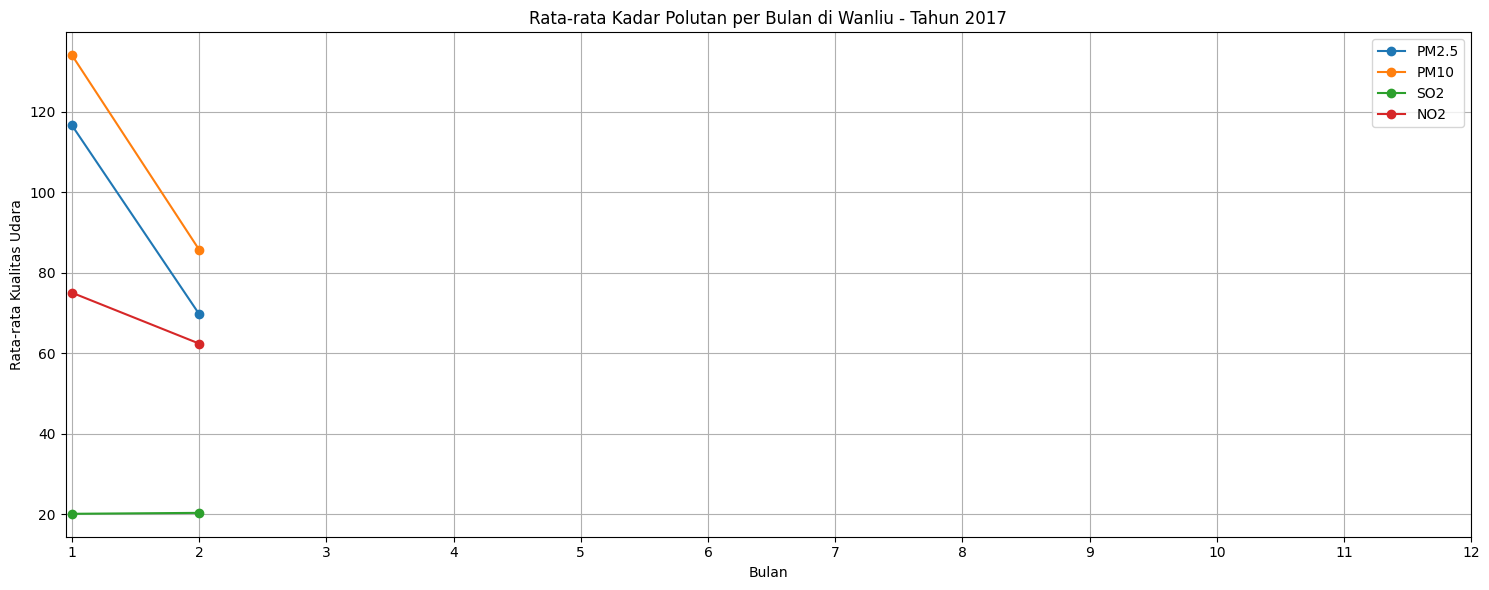

In [ ]:
def yearly_summary(fields, station):
    yearly_monthly_mean = main_df.groupby(['year', 'month', 'station']).mean().reset_index()
    
    years = main_df['year'].unique()
    monthly = main_df['month'].unique()
    monthly.sort()

    for year in years:
        yearly_data = yearly_monthly_mean[(yearly_monthly_mean['year'] == year) & (yearly_monthly_mean['station'] == station)]

        plt.figure(figsize=(15, 6))

        for polutan in fields:
            plt.plot(yearly_data['month'], yearly_data[polutan], label=polutan, marker='o')

        plt.xlabel('Bulan')
        plt.ylabel('Rata-rata Kualitas Udara')
        plt.title(f'Rata-rata Kadar Polutan per Bulan di {station} - Tahun {year}')
        plt.legend()
        plt.grid(True)
        plt.xticks(monthly)
        plt.tight_layout()
        plt.show()

yearly_summary(['PM2.5', 'PM10', 'SO2', 'NO2'], 'Wanliu')

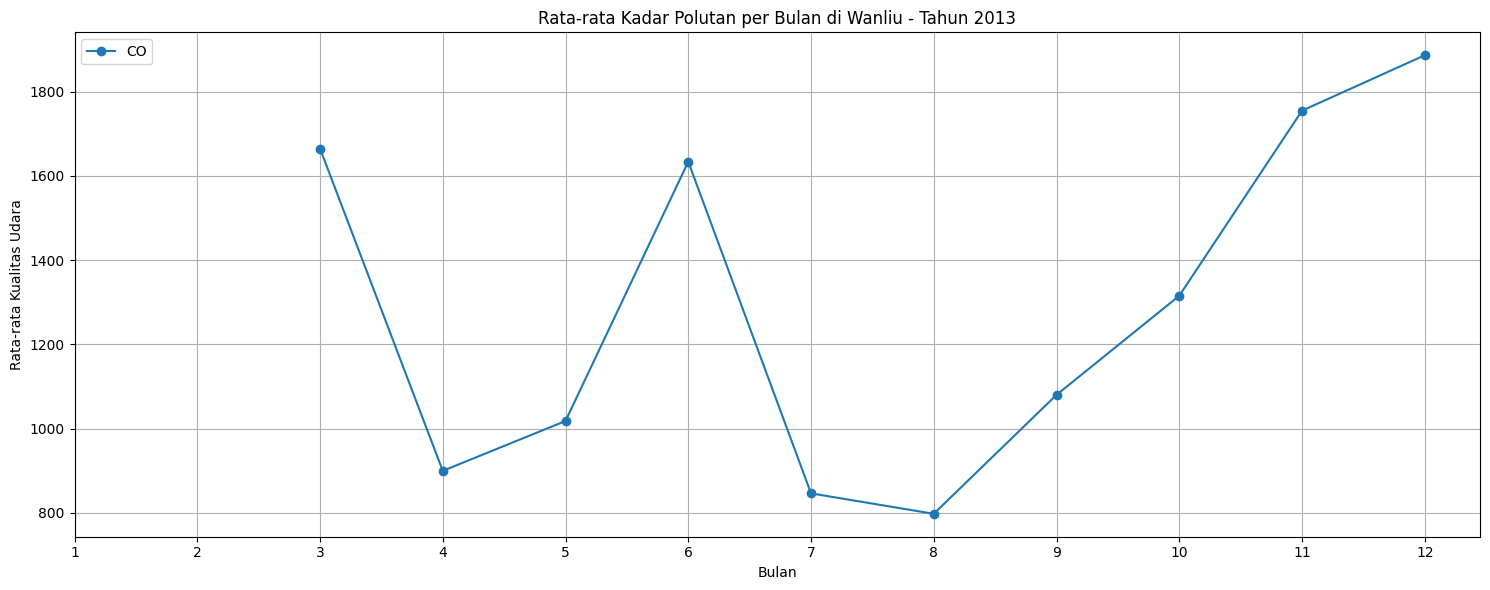

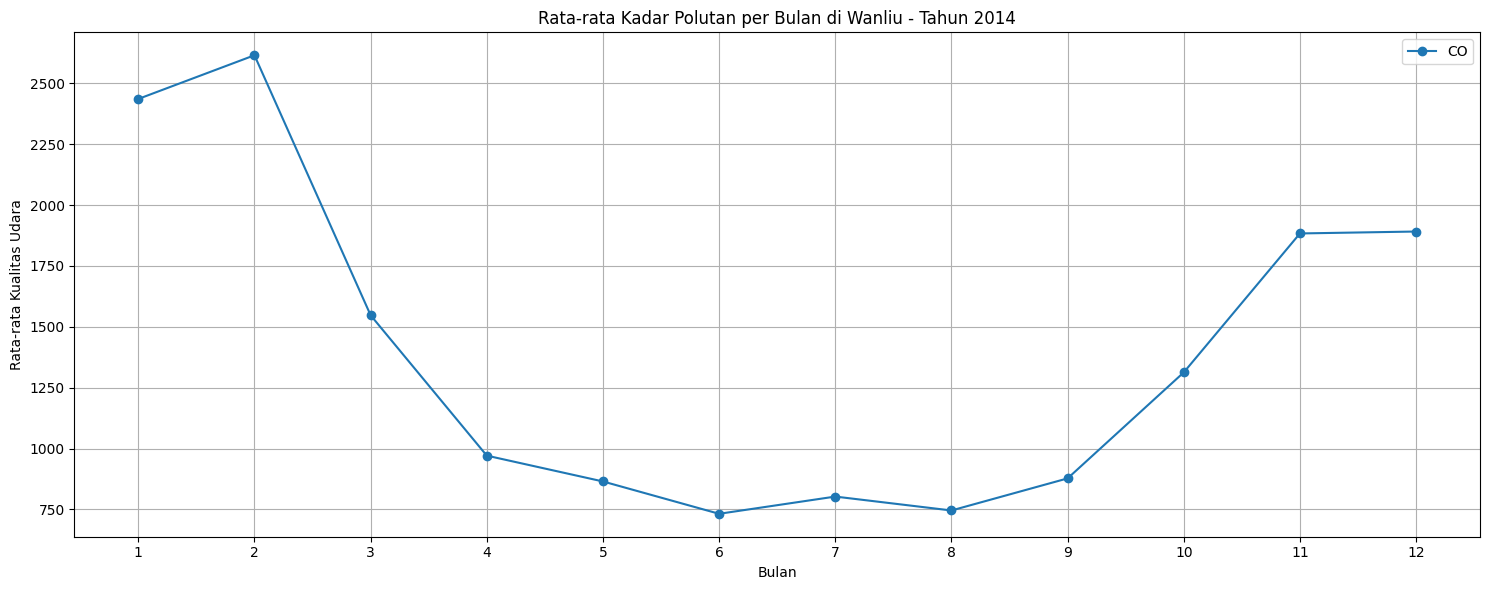

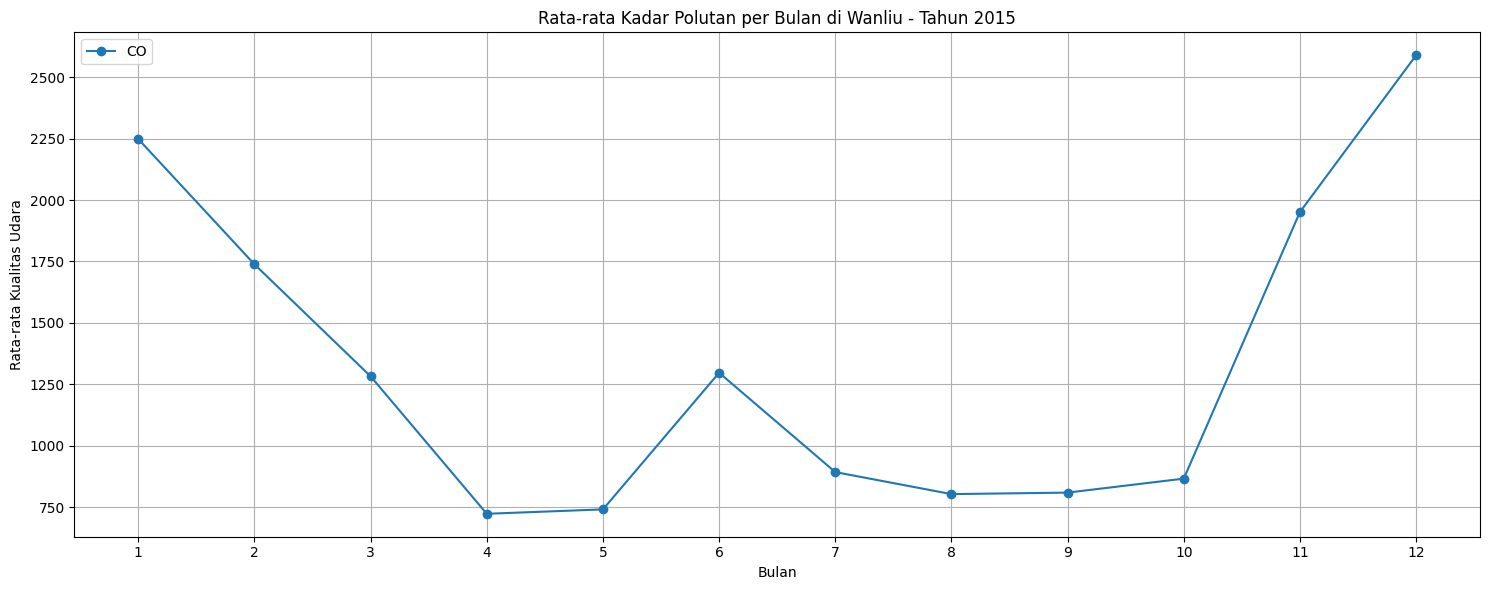

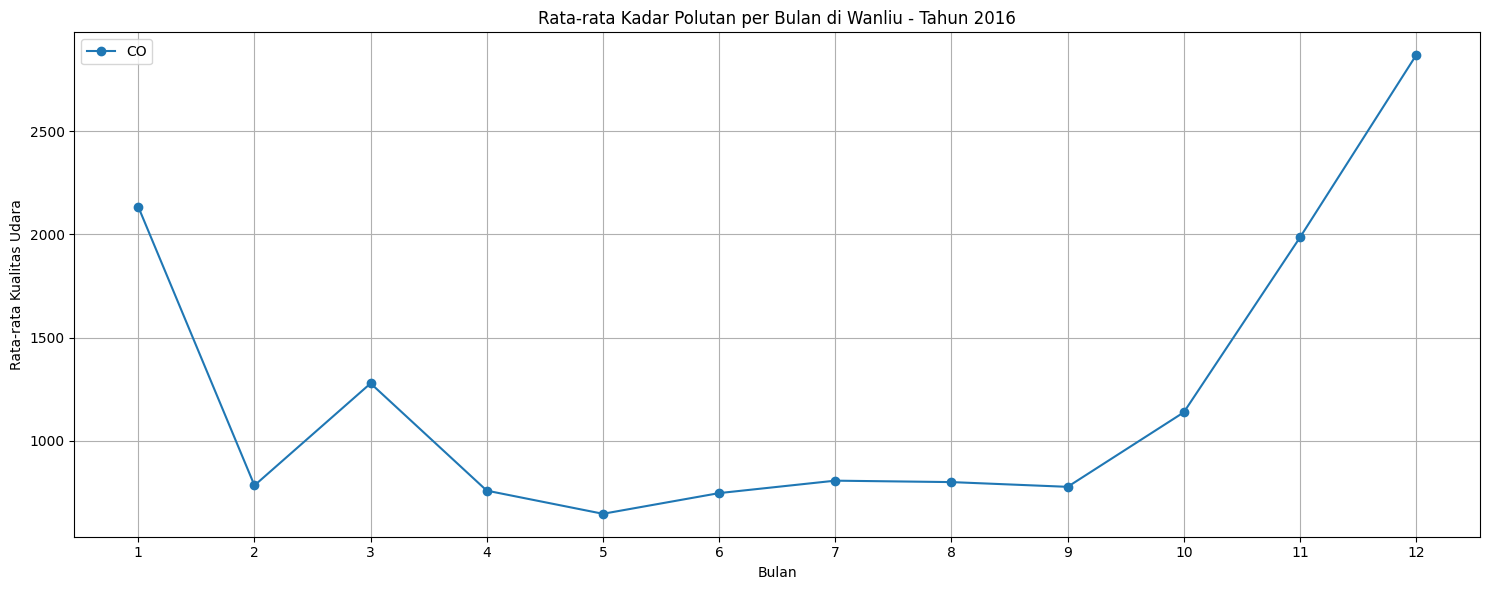

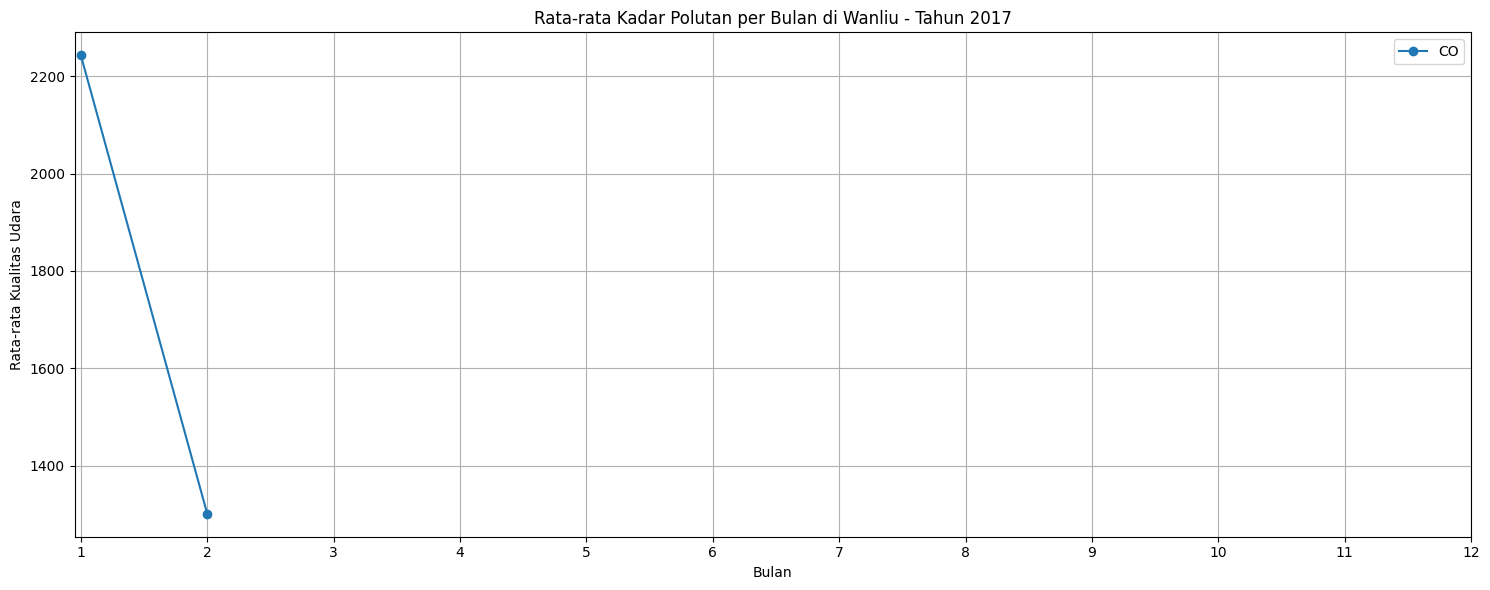

In [28]:
yearly_summary(['CO'],'Wanliu')

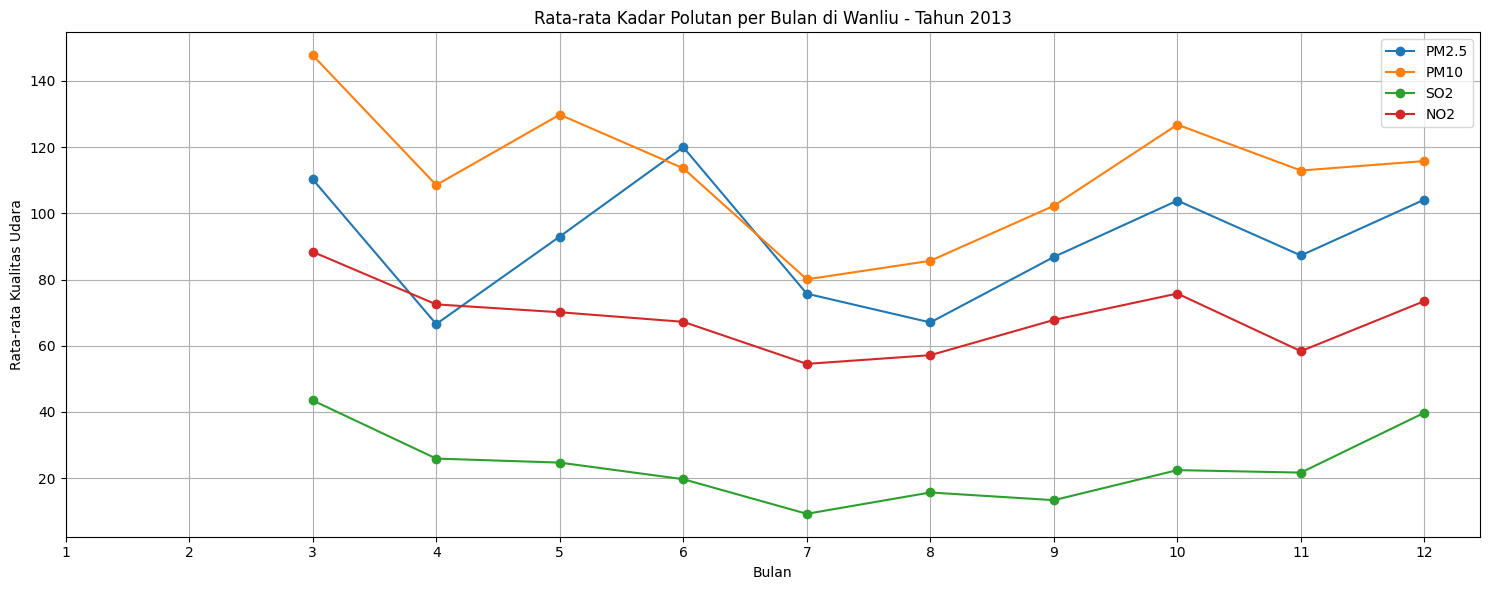

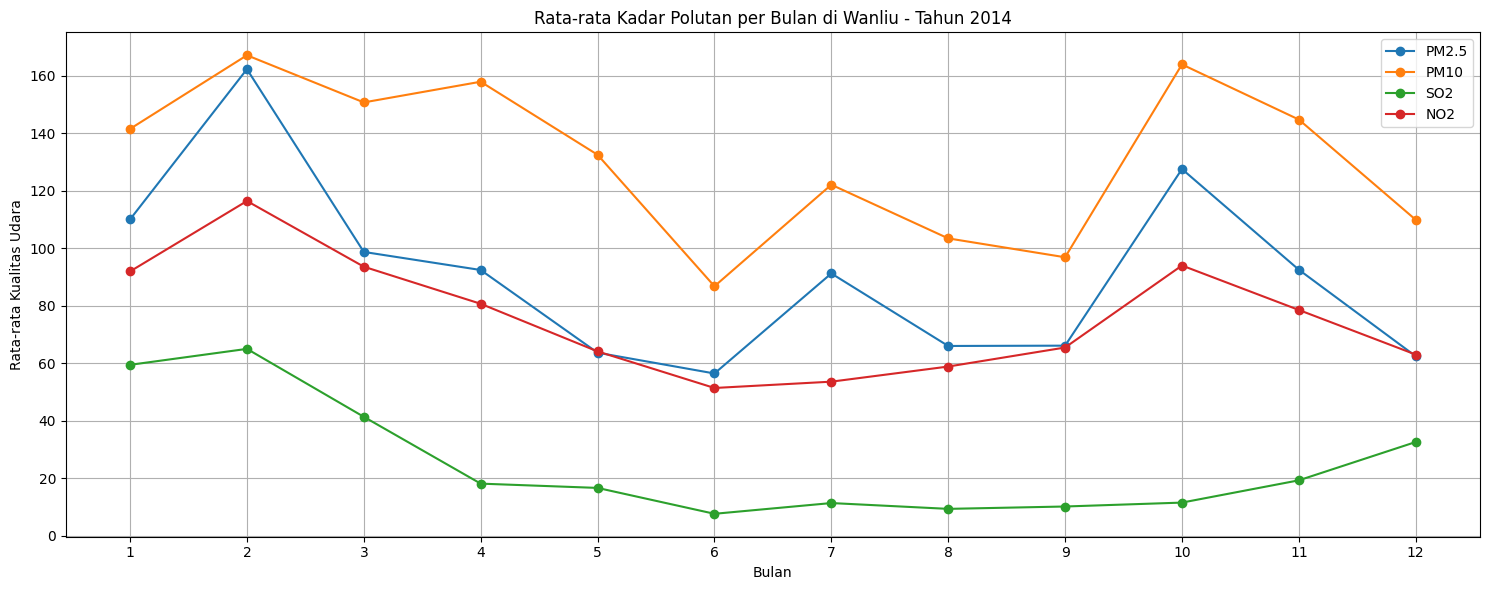

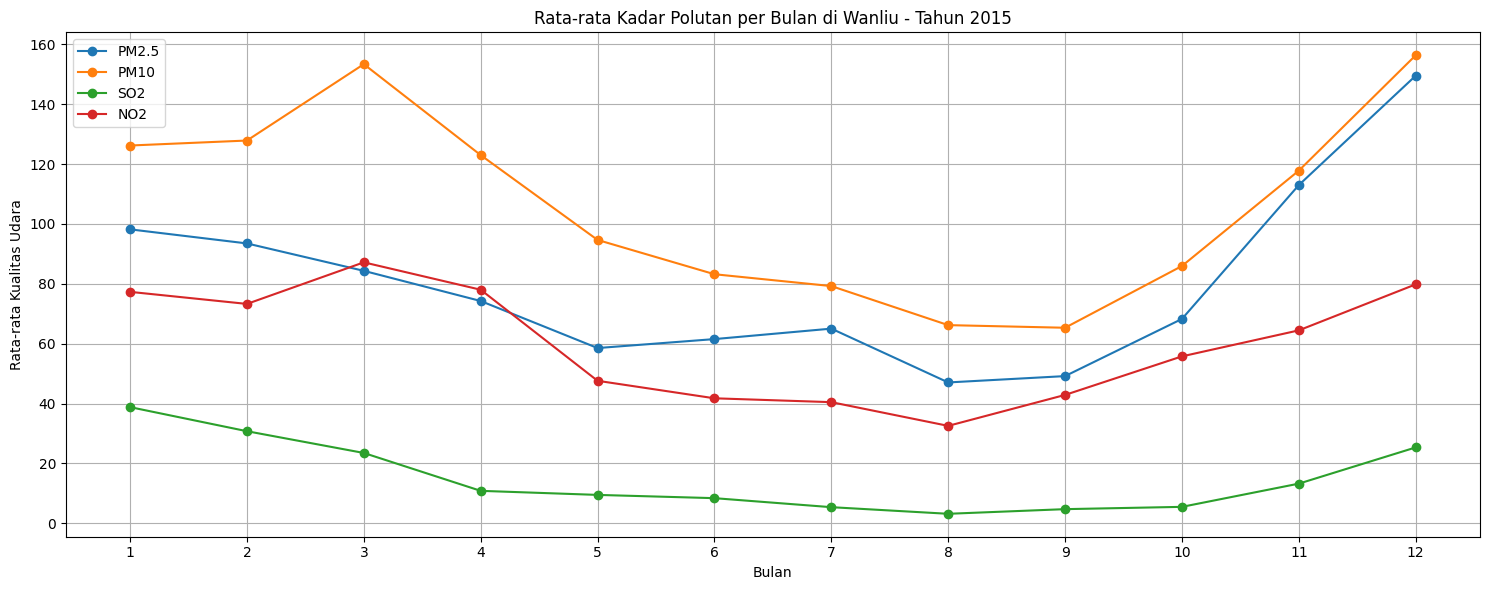

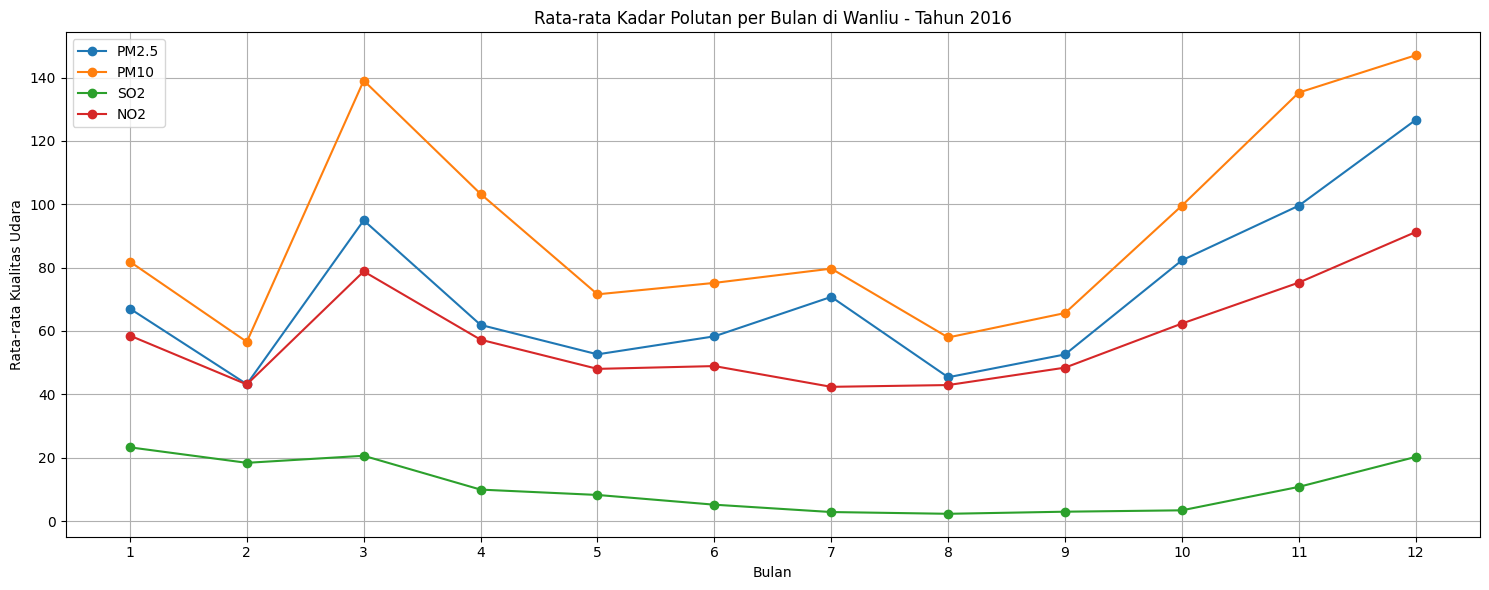

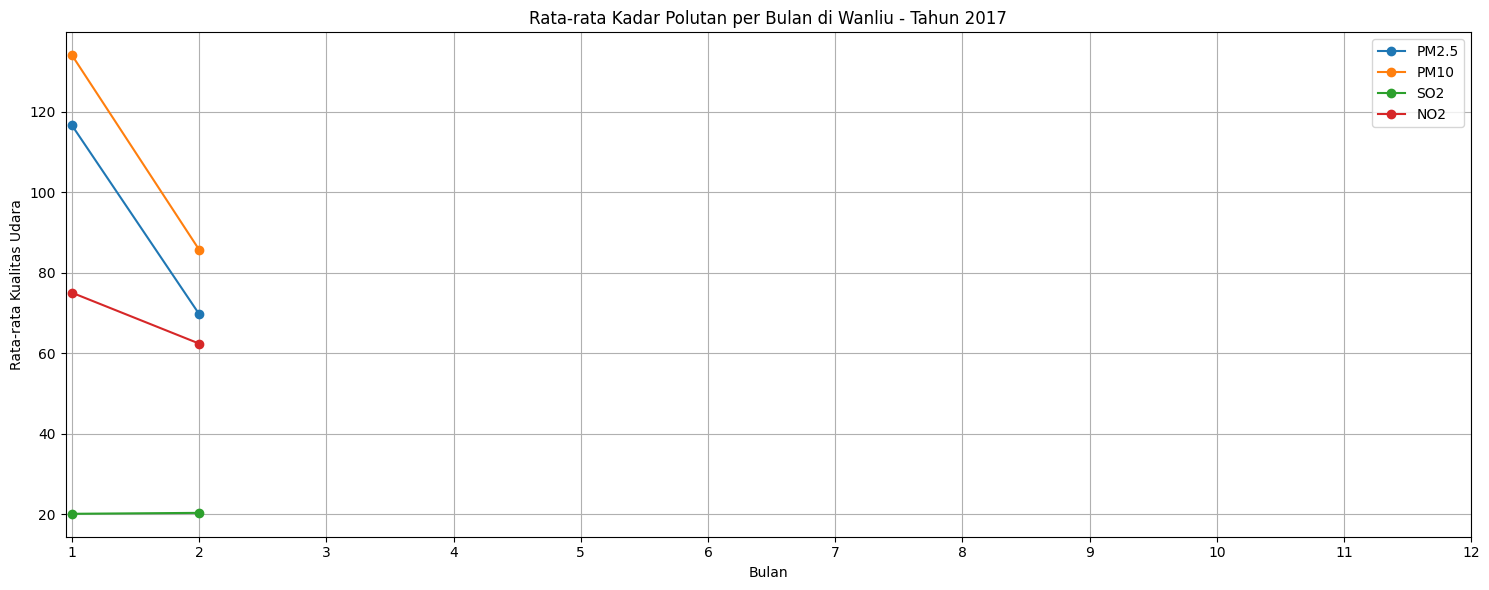

In [29]:
yearly_summary(['PM2.5', 'PM10', 'SO2', 'NO2'],'Wanliu')

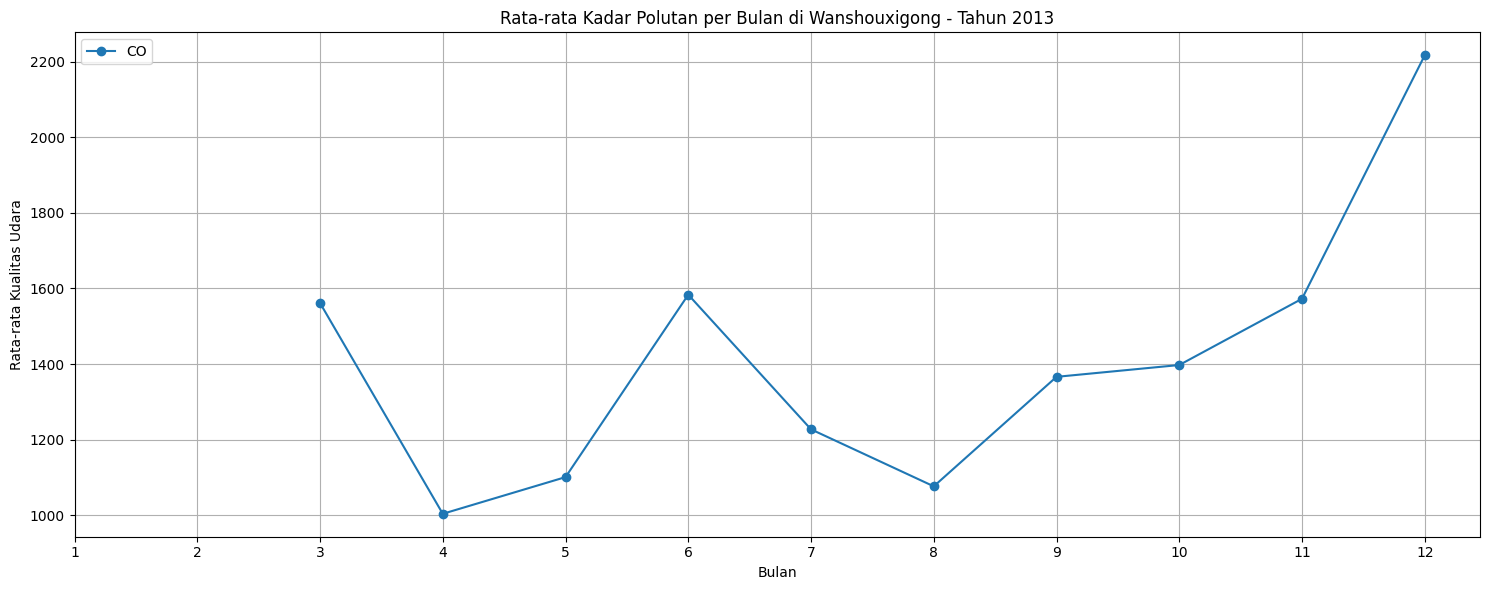

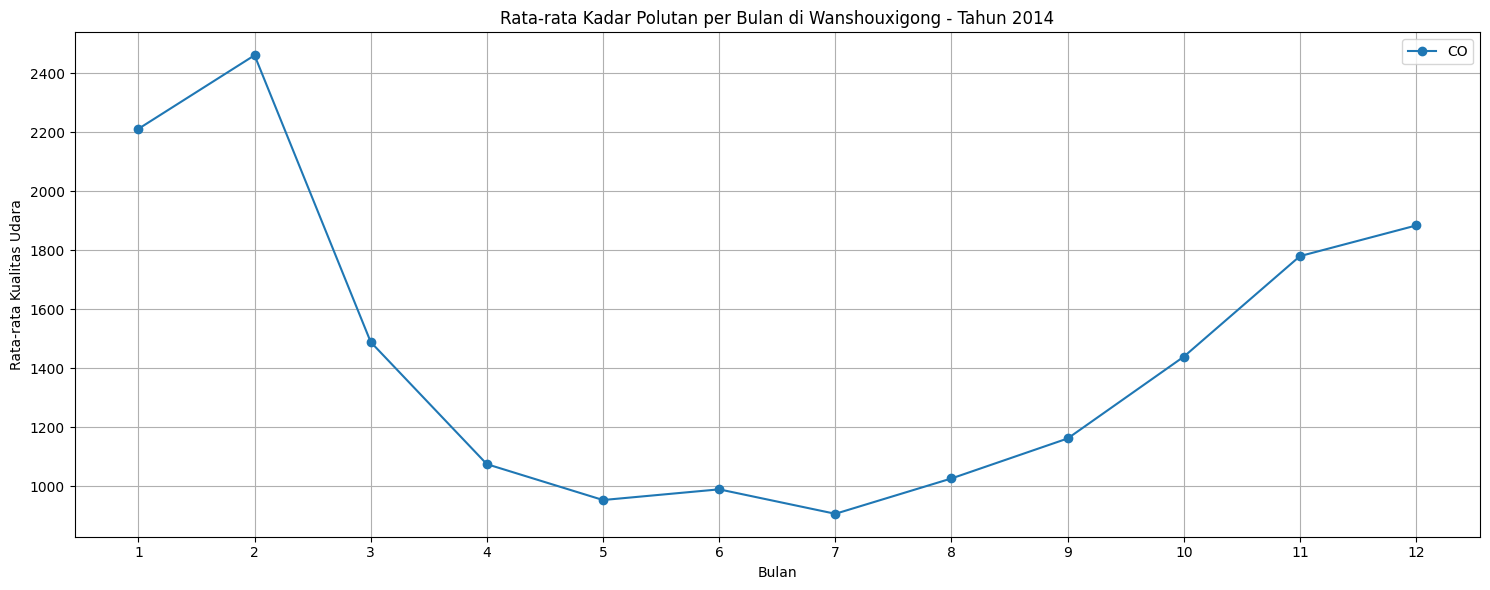

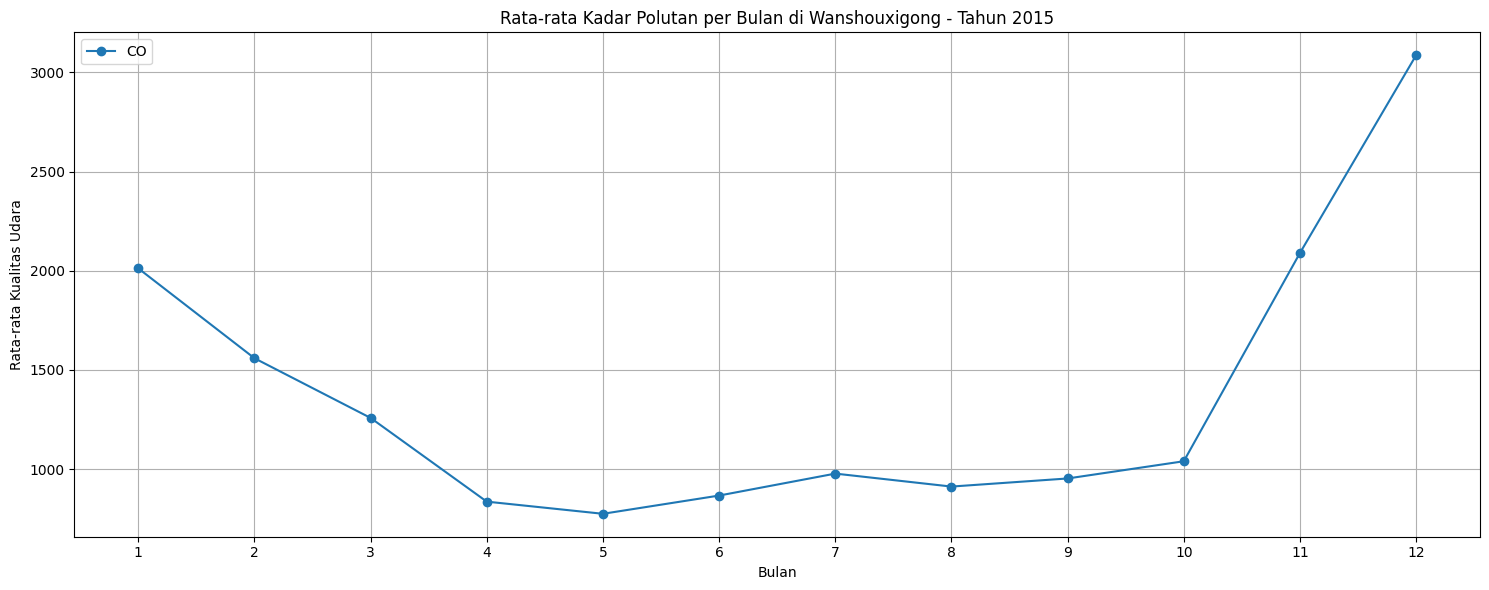

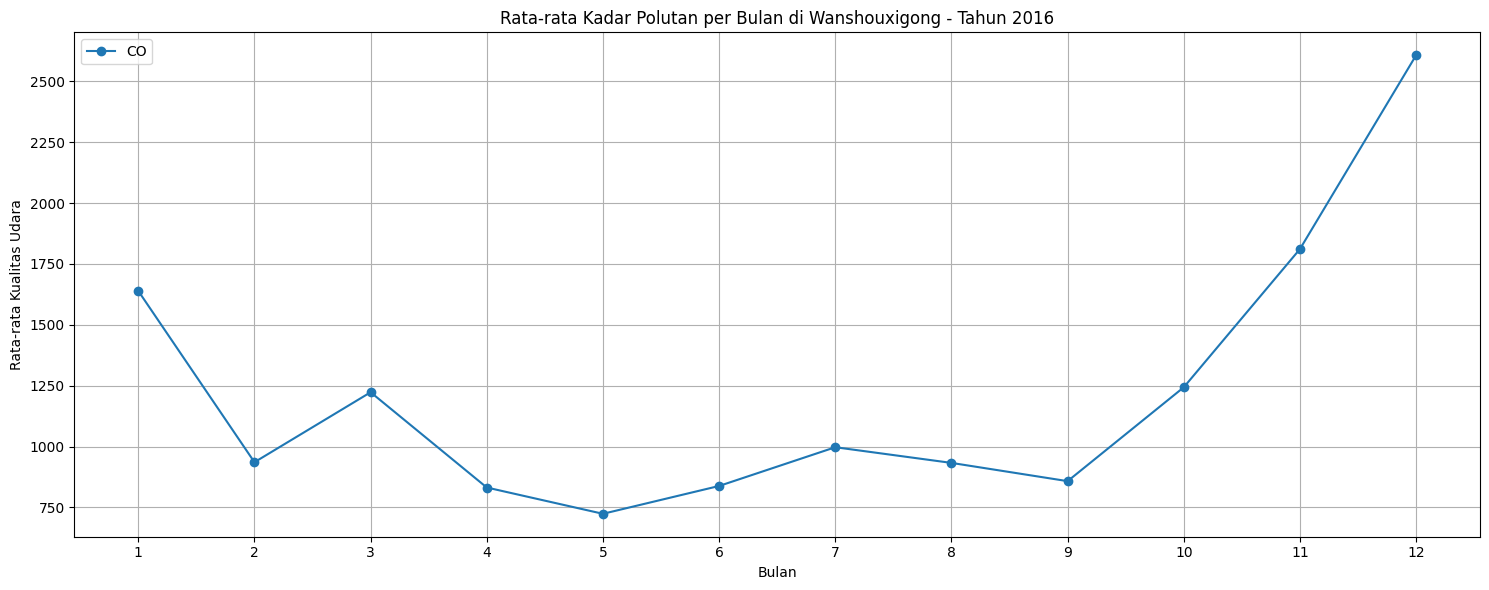

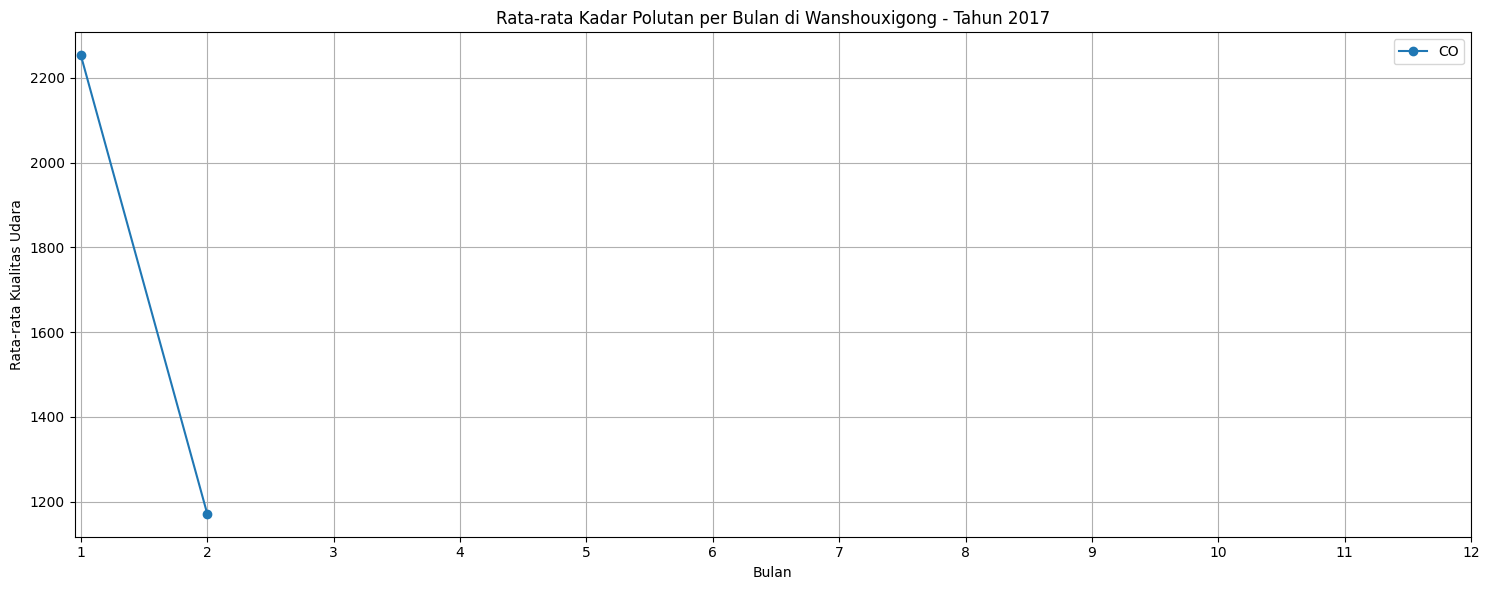

In [30]:
yearly_summary(['CO'],'Wanshouxigong')

### Pertanyaan 1: Bagaimana kondisi harian udara di Wanliu dan Wanshuxigong,pada jam berapa kadar polutan cenderung tinggi?

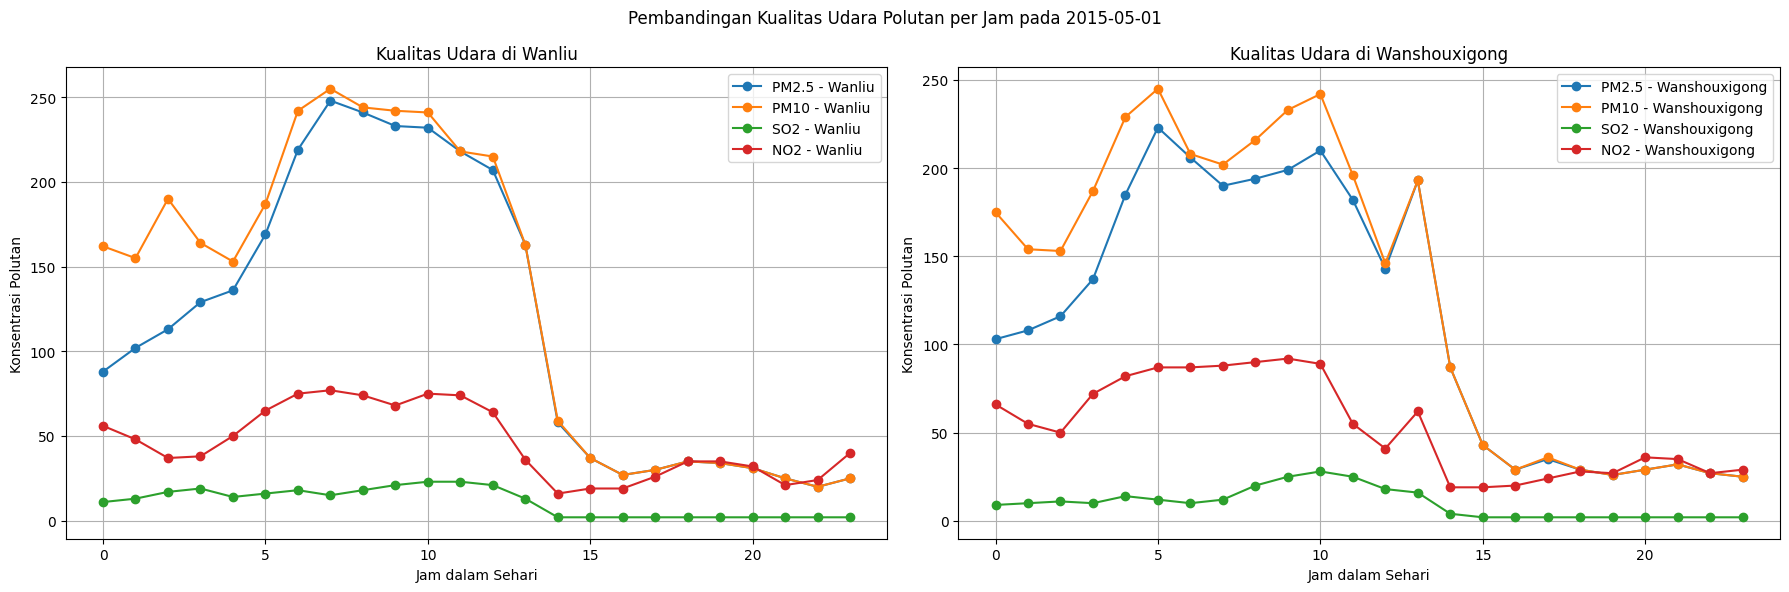

In [39]:
def get_data(station, date):
    data = main_df.loc[(main_df['date'] == date) & (main_df['station'] == station)]
    return data

def daily_pattern_compare(polutan, stations, date):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    fig.suptitle(f'Pembandingan Kualitas Udara Polutan per Jam pada {date}', y=0.98)

    for i, station in enumerate(stations):
        data_station = get_data(station, date)
        for pol in polutan:
            axes[i].plot(data_station['hour'], data_station[pol], marker='o', linestyle='-', label=f'{pol} - {station}')
            axes[i].set_title(f'Kualitas Udara di {station}')
            axes[i].set_xlabel('Jam dalam Sehari')
            axes[i].set_ylabel('Konsentrasi Polutan')
            axes[i].grid(True)
            axes[i].legend()

    plt.tight_layout()
    plt.show()

stations = main_df['station'].unique()
daily_pattern_compare(['PM2.5', 'PM10', 'SO2', 'NO2'], stations[:2], '2015-05-01')


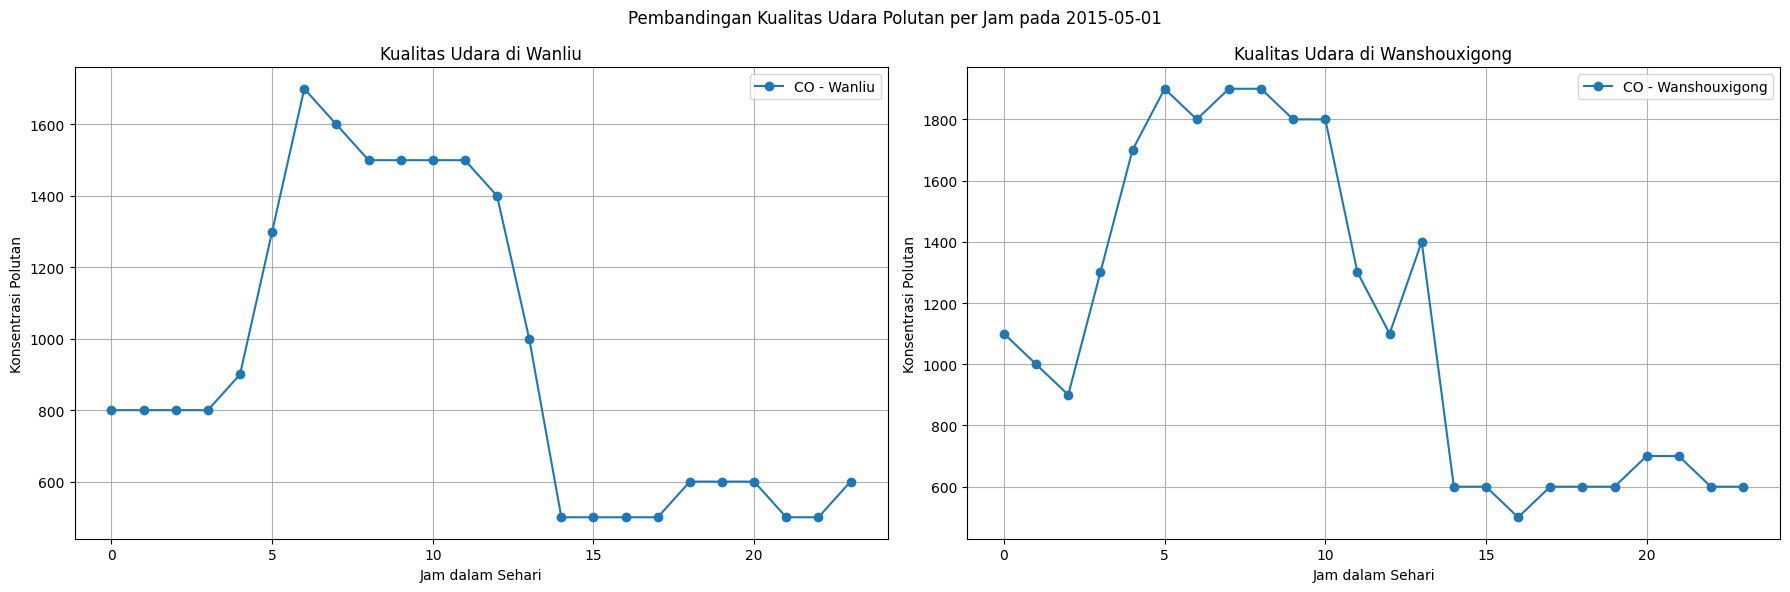

In [40]:
daily_pattern_compare(['CO'], stations[:2], '2015-05-01')

### Pertanyaan 2: Bagaimana Ringkasan kadar polutan Bulanan di Wanliu dan Wanshouxigong pada bulan Mei 2015?

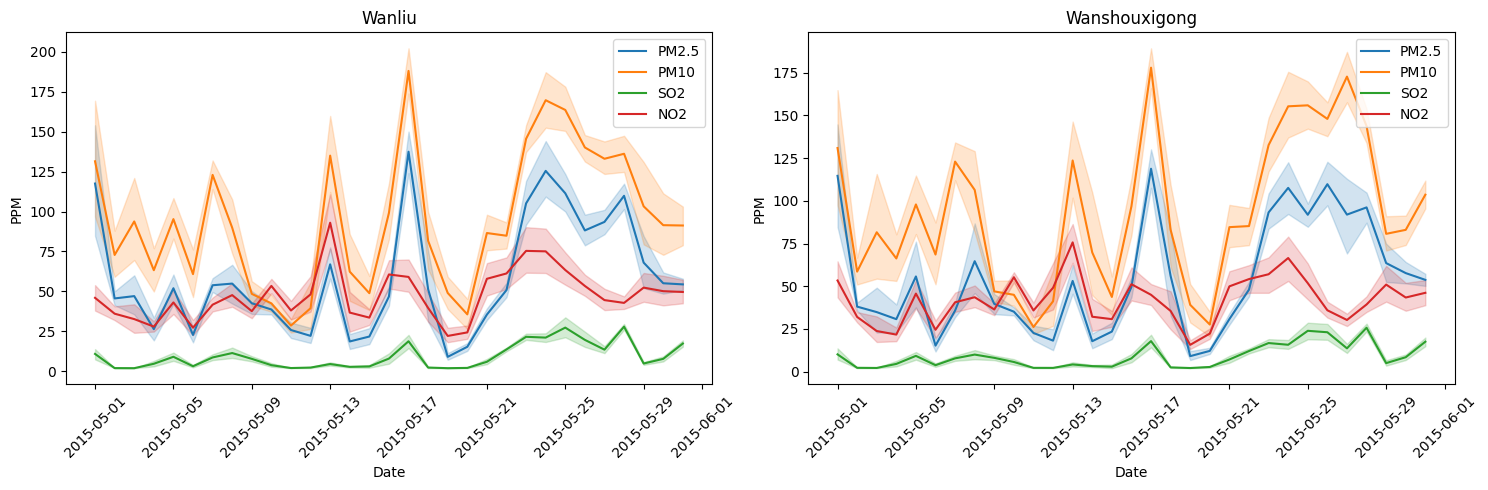

In [36]:
# Mengonversi kolom 'date' menjadi tipe data datetime
main_df['date'] = pd.to_datetime(main_df['date'])

def create_subplots(df, start_date, end_date,content_value):
    # Filter data berdasarkan tanggal mulai dan akhir
    filtered_data = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

    stations = filtered_data['station'].unique()

    num_rows = 1
    num_cols = 2

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))
    axes = axes.flatten()  # Mengubah matriks 2D menjadi array 1D

    contents = content_value

    for i, station in enumerate(stations):
        station_data = filtered_data[filtered_data['station'] == station]

        for content in contents:
            sns.lineplot(data=station_data, x='date', y=content, ax=axes[i], label=content,)


        axes[i].set_title(station)

        if i >= num_cols * (num_rows - 1):
            axes[i].set_xlabel('Date')

        axes[i].tick_params(axis='x', rotation=45)
        axes[i].set_ylabel('PPM')

        if i == len(stations) - 1:
            axes[i].legend()

    plt.tight_layout()
    plt.show()

start_date = '2015-05-01'
end_date = '2015-05-31'
contents = ['PM2.5','PM10','SO2','NO2']

create_subplots(main_df, start_date, end_date,contents)

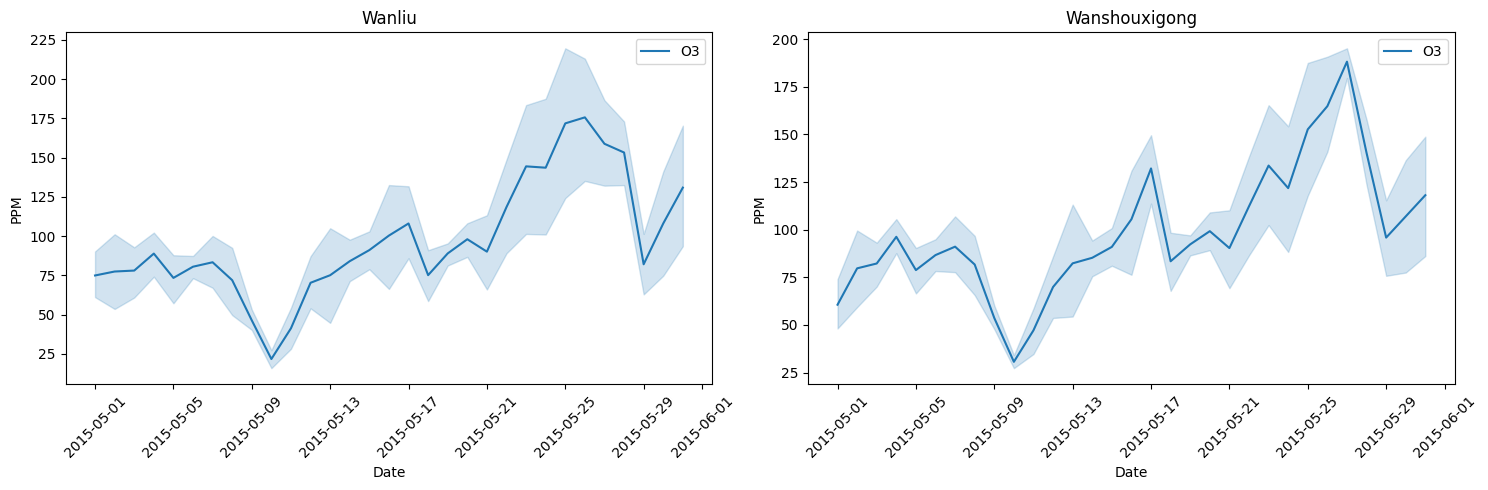

In [37]:
create_subplots(main_df, start_date, end_date,['O3'])

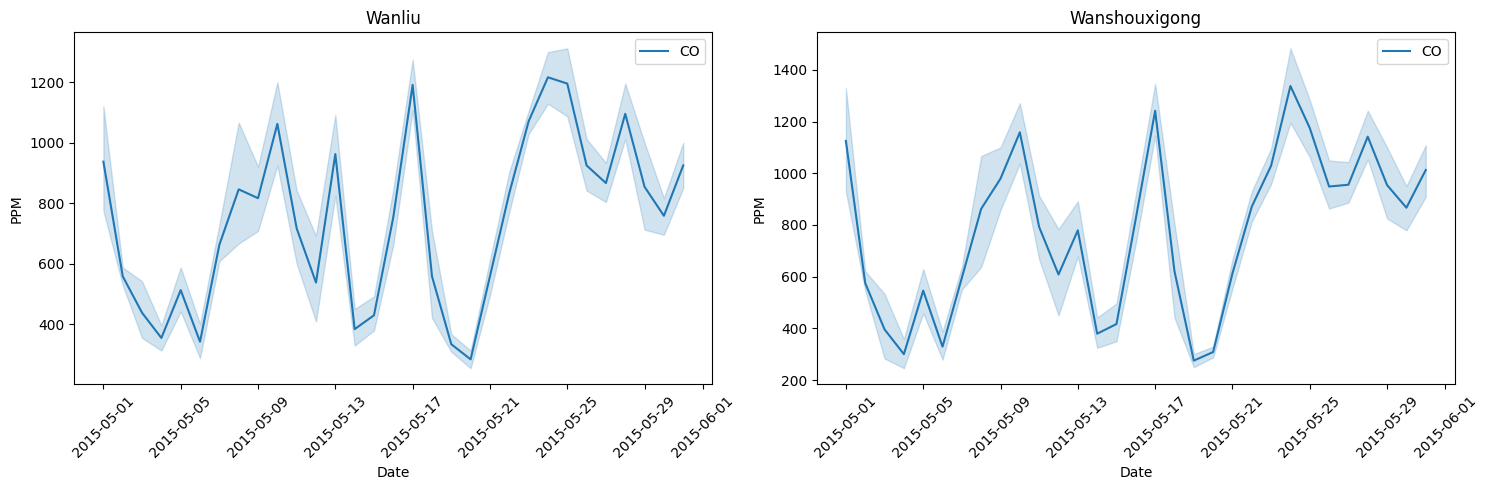

In [38]:
create_subplots(main_df, start_date, end_date,['CO'])

## Conclusion

- Conclution pertanyaan 1 : 
Pada grafik dibawah merupakan data polutan pada tanggal 1 Mei 2015 di Wanliu dan Wanshouxigong.X merupakan Jam dalam sehari sedangkan Y merupakan tingkat konsntrasi polutan.dari grafik kita dapat menyimpulkan kadar polutan cendeerung tinggi pada jam pagi-siang hari.polutan mulai mengalami kenaikan pada sekitar dini hari hingga mencapai titik tertinggi pada jam 6 di kota wanliu dan jam 5 di kota wanshouxigong.hal tersebut menunjukkan bahwa aktivitas masyarakat, industri, ataupun pabrik yang menyebabkan kadar polutan cenderung dilakukan pada pagi hingga siang hari dan kadar polutan mulai turun pada jam 14.
- Conclution pertanyaan 2 : Visualisasi data kadar polutan yang ada di Wanliu dan Wanshouxigong mulai 1 Mei 2015 sampai 29 Mei 2015 Grafik diatas berisi informasi tentang kadar polutan yang ada,garis tengah menunjukkan rata2 kadar polutan dalam sehari sedangkan offside dari garis tersebut menunjukkan data tertinggi dan data terendah kadar polutan dalam seharinya.kadar polutan pada bulan mei 2015 cenderung tinggi pada tanggal 17 Mei 2015.secara keseluruhan bulan mei 2015 kadar polutannya cukup tinggi meskipun disaat weekday dan ketika weekend kadar polutan berada dalam peak tertingginya yaiut tanggal 17 Mei 2015. Hal tersebut menunjukkan betapa aktifnya kegiatan masyarakat Wanliu dan wanshouxigong yang menghasilkan polutan pada bulan ini.

In [41]:
main_df.to_csv("./dashboard/all_data.csv", index=False)